## Root Finding

### Scipy fsolve

In [1]:
# If your function is g(x) = 7 then define it as f(x) = g(x) - 7
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fsolve

def f(x): return x**2 - 1

x_vals = np.linspace(-2, 2, 100)
y_vals = f(x_vals)

In [2]:
print(fsolve(f, 0.5))
print(fsolve(f, -0.5))

[1.]
[-1.]


In [3]:
r1, r2 = fsolve(f, [-.5, 0.5])
print(r1, r2)

-1.0000000000000002 1.0000000000000002


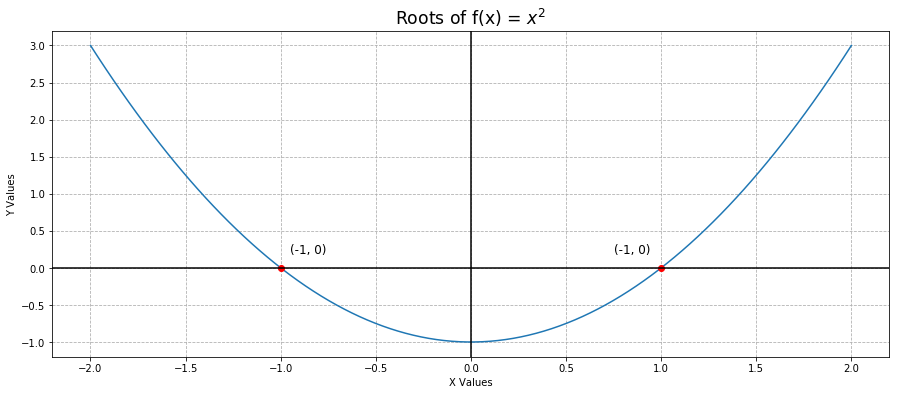

In [4]:
fig = plt.figure(figsize=(15,6))
ax = plt.subplot()

ax.grid(linestyle='dashed')

plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Roots of f(x) = $x^2$', fontsize='xx-large')

plt.plot(x_vals, y_vals)
plt.plot(r1, 0, color='r', marker='o')
plt.plot(r2, 0, color='r', marker='o')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

txt1 = '(-1, 0)'
txt2 = '(1, 0)'
ax.text(-0.95, 0.2, txt1, fontsize=12)
ax.text(0.75, 0.2, txt1, fontsize=12)

plt.show()

### Scipy Brentq

In [5]:
import scipy.optimize as opt

def getRoots(f, a, b, numDivisions):
    """
    This function uses either brentq to determine the roots of a function, on a specified interval. 
    The roots are added to a list, without repetition, and returned by function.
    
    Params:
        func: Function for which roots are determined.
        a: Start point of interval in question.
        b: End point of interval.
        numOfDivisions: Integer is used to slice the interval into equally spaced sub-intervals
    Returns:
        roots: List of roots, with repetitions omitted. 
    """
    
    roots = []
    xRangeIntervals = np.linspace(a, b, numDivisions, endpoint = True)
    
    for numOfIntervals in range(1, len(xRangeIntervals)):
        try:
            roots.append(opt.brentq(f, xRangeIntervals[numOfIntervals-1], xRangeIntervals[numOfIntervals]))
        except:
            pass
        # List is typecast to a set, to eleminate repetition, then back to list type.
        roots = list(set(roots))
        roots.sort()
    return roots

In [6]:
results = getRoots(f, -2, 2, 10)
print(results)

[-0.9999999999999996, 0.9999999999999996]


### Numpy roots

In [11]:
coeff = [1, 0, -1] # (1)x^2 + (0)x + (-1) --> f(x) = x^2 - 1
roots = np.roots(coeff)

# List is typecast to a set, to eleminate repetition, then back to list type.
roots = list(set(roots))
roots.sort()
for root in roots:
    print(root)

-1.0
1.0
